<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Akimkin_Timofey_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%90%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B_%D0%B1%D0%B5%D0%B7_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [165]:
import pandas as pd
from datetime import datetime as dat
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
# import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

#Загрузка датасета

In [166]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/Project_4%20-%20Loseless%20flights.csv'
data = pd.read_csv(path)
        
data.sample(15)

,flight_id,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,avg_speed,aircraft_model,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight_eval1,income_per_flight_eval2
46,136423,Анапа,Москва,2017-01-10T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,129,1849400.00,1681521.00,1683660.00
22,136264,Анапа,Москва,2017-02-18T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,116,1690800.00,1546695.00,1532588.00
35,136345,Анапа,Москва,2017-01-24T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,108,1517600.00,1377050.00,1351860.00
105,136823,Анапа,Белгород,2017-02-05T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,78,620400.00,583119.00,556522.00
60,136513,Анапа,Новокузнецк,2017-02-28T06:10:00Z,5.17,3661,708.58,Boeing 737-300,130,0,nan,nan,nan
80,136654,Анапа,Белгород,2017-01-19T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,96,759000.00,710933.00,694707.00
71,136605,Анапа,Белгород,2017-02-15T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,97,765300.00,718938.00,701422.00
65,136546,Анапа,Новокузнецк,2017-01-03T06:10:00Z,5.03,3661,727.35,Boeing 737-300,130,0,nan,nan,nan
118,136900,Анапа,Белгород,2017-02-01T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,97,765300.00,718938.00,701422.00
23,136266,Анапа,Москва,2017-02-27T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,108,1566400.00,1432234.00,1408188.00


## **Пояснение к датасету**


*   flight_id - 
*   departure_city
*   arrival_city
*   scheduled_departure
*   flight_duration_in_hr
*   flight_distance
*   avg_speed
*   aircraft_model
*   seats_in_a_plane
*   seats_sold
*   gain_per_flight
*   income_per_flight_eval1
*   income_per_flight_eval2



In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   departure_city           127 non-null    object 
 2   arrival_city             127 non-null    object 
 3   scheduled_departure      127 non-null    object 
 4   flight_duration_in_hr    127 non-null    float64
 5   flight_distance          127 non-null    int64  
 6   avg_speed                127 non-null    float64
 7   aircraft_model           127 non-null    object 
 8   seats_in_a_plane         127 non-null    int64  
 9   seats_sold               127 non-null    int64  
 10  gain_per_flight          118 non-null    float64
 11  income_per_flight_eval1  118 non-null    float64
 12  income_per_flight_eval2  118 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 13.0+ KB


In [168]:
# data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']] =\
#     data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']].\
#         apply(lambda se: se.apply(lambda x: '%.0f' % x), axis=1)

data.drop(['avg_speed', 'income_per_flight_eval1'], axis=1, inplace=True)

###Рейсы в Новокузнецк не имеют статус отменненых, однако **данных** по количеству купленных билетов и соответственно по прибыли нет

In [169]:
print('Количество непустых строк по городу прибытия Новокузнецк: ', data[(data.seats_sold != 0) & (data.arrival_city == 'Новокузнецк')].shape[0])

data.fillna(0, inplace=True) # заполняем отсутствующие данные нулями

Количество непустых строк по городу прибытия Новокузнецк:  0


##Распределение заполняемости самолета по рейсам и модели самолета

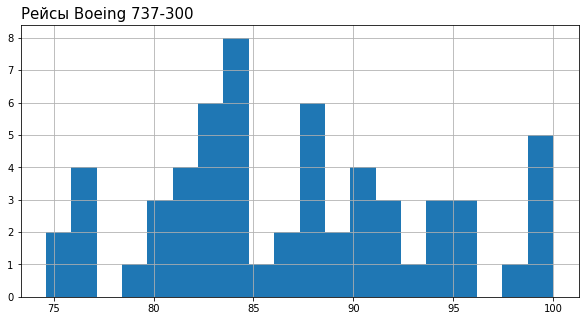

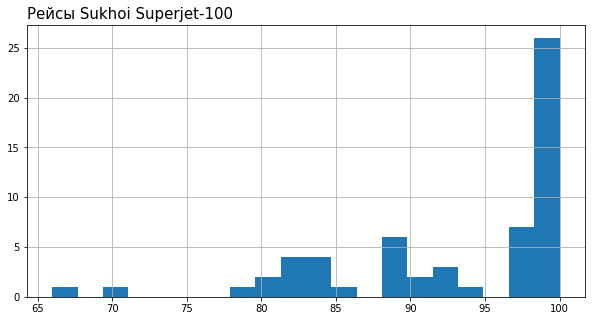

In [170]:
# вводим столбец "Заполняемость самолета"
data['occupancy_rate'] = data.seats_sold / data.seats_in_a_plane * 100

for model in data.aircraft_model.unique():
    plt.figure(figsize = (10, 5))
    data[(data.aircraft_model == model) & (data.seats_sold != 0)].occupancy_rate.hist(bins=20);
    plt.title(f'Рейсы {model}', fontdict = {'fontsize': 15}, loc='left')
    plt.show()

##Рейсы с низкой заполняемостью

In [175]:
data[(data.occupancy_rate > 0) & (data.occupancy_rate < 75)][['flight_id', 'scheduled_departure', 'arrival_city']]

,flight_id,scheduled_departure,arrival_city
2,136122,2017-01-08T10:05:00Z,Москва
38,136360,2017-02-05T10:05:00Z,Москва
77,136642,2017-01-30T09:25:00Z,Белгород
102,136807,2017-02-23T09:25:00Z,Белгород


In [172]:
df1 = pd.DataFrame(data.groupby(by=['arrival_city', 'aircraft_model'])['departure_city'].count())
df1.columns = ['num_of_flights']

df2 = data.drop(['flight_id'], axis=1).groupby(by=['arrival_city', 'aircraft_model']).mean()
df2.rename(columns={'income_per_flight_eval2': 'income_per_flight'}, inplace=True)
df2['income_per_flight_hr'] = df2.income_per_flight / df2.flight_duration_in_hr
pd.concat([df1, df2], axis=1)

,,num_of_flights,flight_duration_in_hr,flight_distance,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight,occupancy_rate,income_per_flight_hr
arrival_city,aircraft_model,,,,,,,,,
Белгород,Sukhoi Superjet-100,59,0.83,636.00,97.00,90.19,710435.59,646135.15,92.98,774050.23
Москва,Boeing 737-300,59,1.66,1208.00,130.00,113.12,1642576.27,1480688.46,87.01,889921.42
Новокузнецк,Boeing 737-300,9,5.11,3661.00,130.00,0.00,0.00,0.00,0.00,0.00
